<a href="https://colab.research.google.com/github/Zeeshan13/Colab_HuggingFace/blob/main/EAI6010_Module_4_quickstart_tutorial_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


PyTorch offers domain-specific libraries such as TorchText, TorchVision, and TorchAudio, all of which include datasets. For this tutorial, we will be using a TorchVision dataset.

The torchvision.datasets module contains Dataset objects for many real-world vision data like CIFAR, COCO (full list here). In this tutorial, we use the FashionMNIST dataset. Every TorchVision Dataset includes two arguments: transform and target_transform to modify the samples and labels respectively.



Here we are importing the necessary libraries for neural network creation, data loading, dataset handling, image transformation, and visualization. These libraries provide essential tools for building and training neural networks with PyTorch.

### **Downloading the Dataset**

In [ ]:
from torchvision.datasets import FashionMNIST
train = FashionMNIST('./fashionmnist_folder', train=True, download=True)

100%|██████████| 26421880/26421880 [00:00<00:00, 110649779.16it/s]


Extracting ./fashionmnist_folder/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 56398579.75it/s]

Extracting ./fashionmnist_folder/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 40218487.04it/s]


Extracting ./fashionmnist_folder/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13070385.59it/s]

Extracting ./fashionmnist_folder/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./fashionmnist_folder/FashionMNIST/raw



In this step, we download the FashionMNIST dataset and store it locally. The FashionMNIST dataset consists of grayscale images of various clothing items, which are used to train our neural network model.

### **Viewing the Dataset**

In [ ]:
train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ./fashionmnist_folder
    Split: Train

In [ ]:
train[0]

(<PIL.Image.Image image mode=L size=28x28>, 9)

In [ ]:
image,label = train[0]

Here we access the first image and label from the dataset. This step helps us understand the format of the data we are working with and allows us to visualize the images and their corresponding labels.

In [ ]:
image

In [ ]:
label

9

In [ ]:
image,label = train[7]

In [ ]:
image

In [ ]:
label

2

### **Image Resizing**

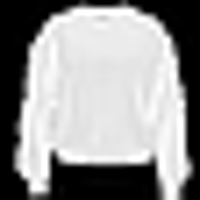

In [ ]:
from PIL import Image
new_image = image.resize((200,200))
new_image

We use the PIL library to resize the image to a larger dimension for better visualization. This step demonstrates how to manipulate images, although resizing is not necessary for the neural network training.

### **Loading Training and Test Data**

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:00<00:00, 108525220.36it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6585534.77it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 64659041.76it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 16234794.73it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Here, we download and transform the training and test datasets. The ToTensor() transformation converts images to tensors, which are suitable for training neural networks. The datasets are stored locally in the specified root directory.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
training_data[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
           0.0000, 0.0000, 0.1608, 0.7373, 0.4039, 0.2118, 0.1882, 0.1686,
           0.3412, 0.6588, 0.5216, 0.0627, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000, 0.1922,
           0.5333, 0.8588, 0.8471, 0.8941, 0.9255, 1.0000, 1.0000, 1.0000,
           1.0000, 0.8510, 0.8431, 0.9961, 0.9059, 0.6275, 0.1765, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0549, 0.6902, 0.8706,
           0.8784, 0.8314, 0.7961, 0.7765, 0.7686, 0.7843, 0.8431, 0.8000,
           0.7922, 0.7882, 0.7882, 0.7882, 0.8196, 0.8549, 0.8784, 0.6431,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7373, 0.8588, 0.7843,
           0.7765, 0.7922, 0.7765, 0.7804, 0.7804, 0.7882, 0.7686, 0.7765,
           0.7765, 0.7843, 0.7843, 0.7843, 

In [ ]:
image,tag = training_data[0]

In [ ]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
tag

9

### **Visualizing the Data**

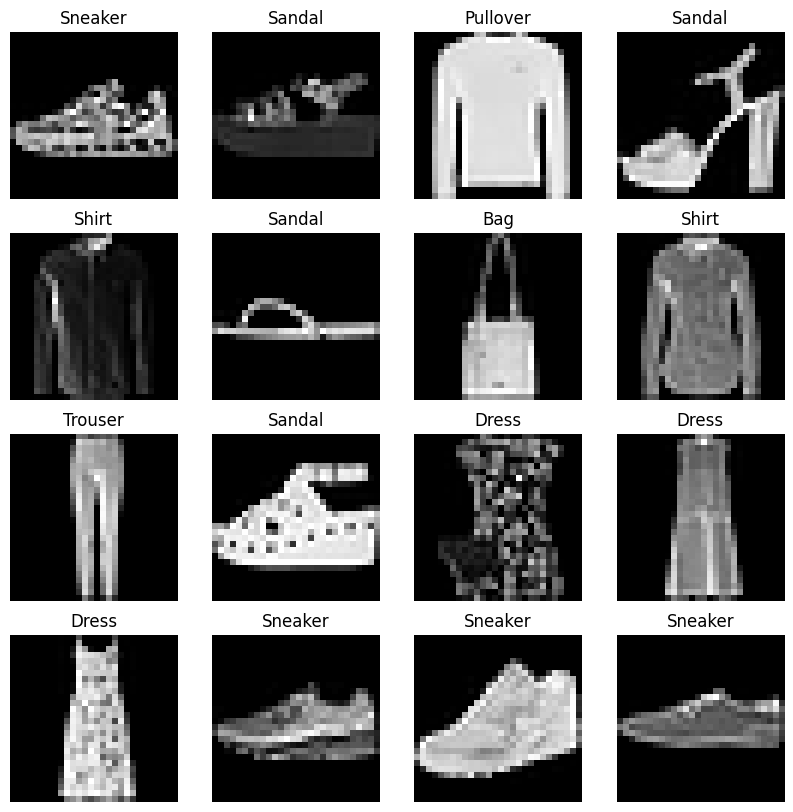

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

We create a grid of sample images with their labels to visualize the data. This step helps verify the content and correctness of the dataset, ensuring that the images and labels are correctly loaded.

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

### **Creating DataLoaders**

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


We create data loaders for the training and testing datasets. Data loaders handle batching, shuffling, and loading of data efficiently during training, enabling us to process the data in manageable batches.

In [ ]:
train_dataloader

In [ ]:
for image,label in train_dataloader:
  print(image)
  print(label)
  print(len(image))

Streaming output truncated to the last 5000 lines.
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 

Creating Models
To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the __init__ function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

### **Defining the Neural Network**

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Optimizing the Model Parameters
To train a model, we need a loss function and an optimizer.



We define the architecture of the neural network, which consists of three fully connected layers with ReLU activations. This structure allows the model to learn complex patterns in the data. The model is moved to the GPU if available to accelerate computations.

### **Setting Up Loss Function and Optimizer**

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Here, we define the loss function (**nn.CrossEntropyLoss**) and optimizer (**torch.optim.SGD**) for training the model. The loss function measures the model's performance, and the optimizer updates the model parameters to minimize the loss.

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

### **Training the Model**

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We define the training loop for the model. This function trains the model on the training dataset, computes the loss, backpropagates errors, and updates model parameters. The loss is printed periodically to monitor training progress.

We also check the model’s performance against the test dataset to ensure it is learning.



### **Testing the Model**

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

We define the testing loop for the model. This function evaluates the model on the test dataset, calculates accuracy and average loss, and prints the results. It ensures the model is learning and generalizing well.

The training process is conducted over several iterations (epochs). During each epoch, the model learns parameters to make better predictions. We print the model’s accuracy and loss at each epoch; we’d like to see the accuracy increase and the loss decrease with every epoch.

### **Training and Testing Over Epochs**

In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.301584  [    0/60000]
loss: 2.295325  [ 6400/60000]
loss: 2.265539  [12800/60000]
loss: 2.258979  [19200/60000]
loss: 2.260685  [25600/60000]
loss: 2.209185  [32000/60000]
loss: 2.227072  [38400/60000]
loss: 2.187017  [44800/60000]
loss: 2.184607  [51200/60000]
loss: 2.151294  [57600/60000]
Test Error: 
 Accuracy: 35.4%, Avg loss: 2.149980 

Epoch 2
-------------------------------
loss: 2.159823  [    0/60000]
loss: 2.153653  [ 6400/60000]
loss: 2.090109  [12800/60000]
loss: 2.105977  [19200/60000]
loss: 2.069415  [25600/60000]
loss: 1.994071  [32000/60000]
loss: 2.022433  [38400/60000]
loss: 1.941057  [44800/60000]
loss: 1.941526  [51200/60000]
loss: 1.874800  [57600/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.877476 

Epoch 3
-------------------------------
loss: 1.904164  [    0/60000]
loss: 1.886759  [ 6400/60000]
loss: 1.766594  [12800/60000]
loss: 1.801626  [19200/60000]
loss: 1.710224  [25600/60000]
loss: 1.647786  [32000/600

We train and test the model over multiple epochs. This loop runs the training and testing functions for a specified number of epochs, printing progress and performance metrics to monitor improvements.

### **Saving the Model**

Saving Models
A common way to save a model is to serialize the internal state dictionary (containing the model parameters).



In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


We save the trained model's parameters to a file. This step allows us to reuse the trained model in the future without retraining it from scratch.

### **Loading the Model**

Loading Models
The process for loading a model includes re-creating the model structure and loading the state dictionary into it.



In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

We load a previously saved model by recreating the model structure and loading the saved parameters. This step enables us to use the trained model for inference or further training.

### **Making Predictions**

This model can now be used to make predictions.



In [ ]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


We use the trained model to make predictions on new data. The model predicts the class of a test image, and the predicted class is compared to the actual class to assess the model's performance.

This program demonstrates how to build, train, and evaluate a neural network using PyTorch. The FashionMNIST dataset is used as an example dataset to train a model to classify images of clothing items. The steps include:



1.   **Importing Libraries:** Essential tools for neural network creation, data loading,and visualization.
2.   **Downloading the Dataset:** Fetching the FashionMNIST dataset and storing it locally.
3. **Viewing and Resizing the Dataset:** Understanding the data format and manipulating images for better visualization.
4. **Loading Data:** Transforming images into tensors and creating data loaders for efficient batch processing.
5. **Defining the Neural Network:** Building the architecture of the neural network with fully connected layers and ReLU activations.
6. **Setting Up Loss Function and Optimizer:** Choosing a loss function and optimizer for training the model.
7. **Training the Model:** Iteratively training the model on the training dataset and updating model parameters.
8. **Testing the Model:** Evaluating the model's performance on the test dataset to ensure it generalizes well.
9. **Saving and Loading the Model:** Saving the trained model for future use and loading it for inference or further training.
10. **Making Predictions:** Using the trained model to make predictions on new data and comparing predicted classes with actual classes.

* Each cell in the code serves a specific purpose, such as importing libraries,
downloading data, defining the model, training, testing, saving, loading, and making predictions.

* The data comes from the FashionMNIST dataset provided by TorchVision.

* The data is read using the **datasets.FashionMNIST** class and transformed into tensors using **ToTensor()**.

* The data is stored locally in the specified directory when downloaded.

* The data consists of grayscale images of clothing items, each labeled with a class representing the type of clothing.

* The images are transformed into tensors using the **ToTensor()** transformation, which converts pixel values to normalized tensors suitable for neural network training.

* Loading data involves downloading the dataset, transforming images to tensors, creating data loaders, and batching data for training and testing.

* Training steps include initializing the model, defining the loss function and optimizer, running the training loop, computing predictions, calculating loss, backpropagating errors, and updating model parameters.

* The trained model is used to make predictions by passing image tensors through the model, obtaining logits, and determining the predicted class based on the highest logit value.

